In [21]:
from cProfile import label

import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_excel("../../datasets/raw/bone-marrow_raw.xlsx")
df.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,no,7.20,5.38,1.338760,19,51,yes,yes,32,no,no,999,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16,37,yes,no,1000000,no,yes,163,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,7.94,0.42,19.013230,23,20,yes,no,1000000,no,yes,435,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23,29,yes,yes,19,NaN,no,53,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14,14,no,no,1000000,no,no,2043,0


In [22]:
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

# Data
- Numerical
    - donor_age
    - recipient_age
    - recipient_body_mass
    - HLA_match
    - antigen (?)
    - allel(?)
    - CD34_x1e6_per_kg
    -
- Numerical Categorical

- Categorical
    - recipient_gender
    - donor_age_below_35
    - donor_cmv
    - recipient_age_below_10
    - recipient_age_int (?)
    - recipient_ABO
    - recipient_rh
    - recipient_cmv
    - disease
    - disease_group
    - gender_match
    - ABO_match
    - CMV_status (?)
    - HLA_mismatch
    - HLA_group_1
    - risk_group
    - stem_cell_source
    - tx_post_relapse

### Age exploration

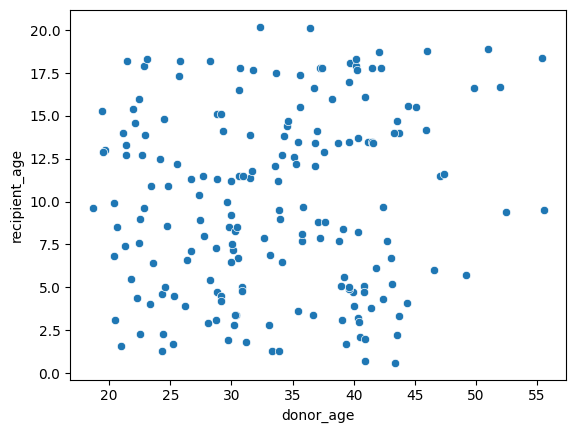

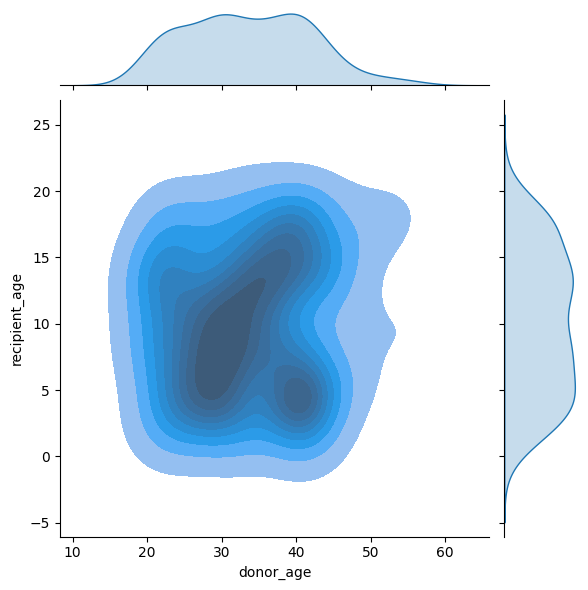

In [23]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="donor_age",
    y="recipient_age"
)

sns.jointplot(
    data=df,
    x="donor_age",
    y="recipient_age",
    kind="kde",
    fill=True
)

C:\Users\Tomás L Pereira\AppData\Local\Temp\ipykernel_33556\1305067188.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


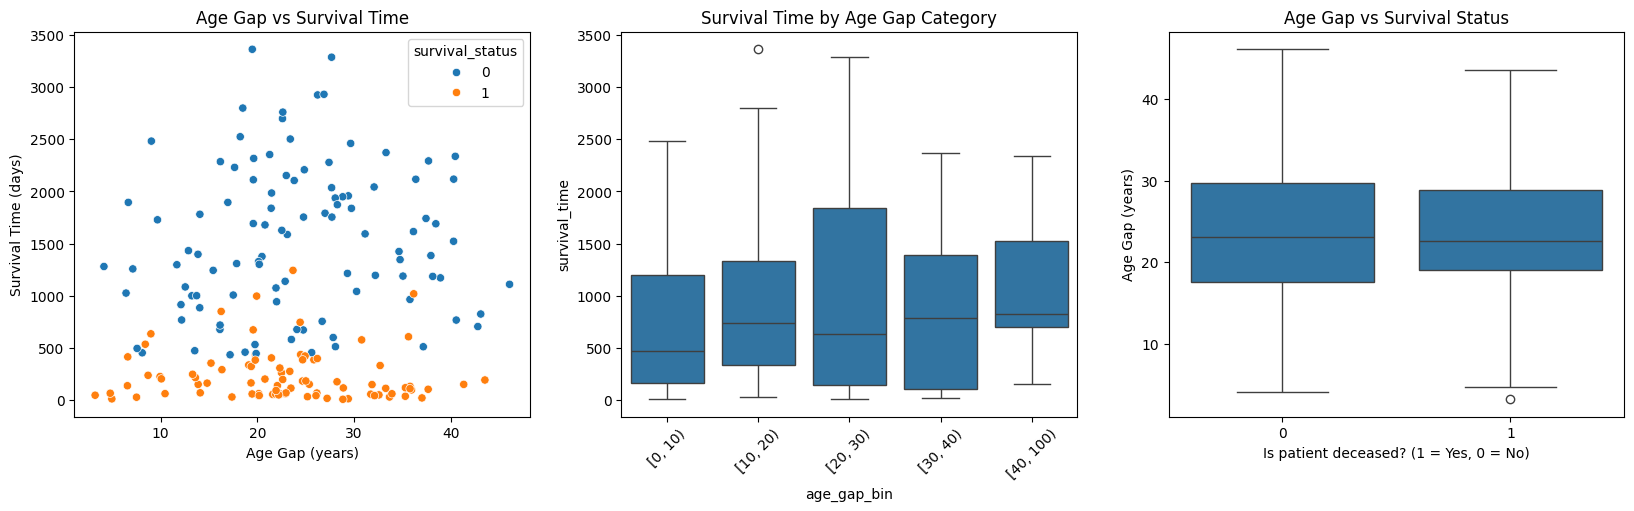

In [24]:
df["age_gap"] = abs(df["donor_age"] - df["recipient_age"])

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.scatterplot(
    data=df,
    x="age_gap",
    y="survival_time",
    hue="survival_status",
    ax=axes[0]
)
axes[0].set_xlabel("Age Gap (years)")
axes[0].set_ylabel("Survival Time (days)")
axes[0].set_title("Age Gap vs Survival Time")

# -----------------

df["age_gap_bin"] = pd.cut(
    df["age_gap"],
    bins=[0, 10, 20, 30, 40, 100],
    right=False
)

sns.boxplot(
    x=df["age_gap_bin"],
    y=df["survival_time"],
    ax=axes[1]
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title("Survival Time by Age Gap Category")

# ----------------
sns.boxplot(
    x=df["survival_status"],          
    y=df["age_gap"],
    ax=axes[2]
)
axes[2].set_xlabel("Is patient deceased? (1 = Yes, 0 = No)")
axes[2].set_ylabel("Age Gap (years)")
axes[2].set_title("Age Gap vs Survival Status")

plt.show()

### Others

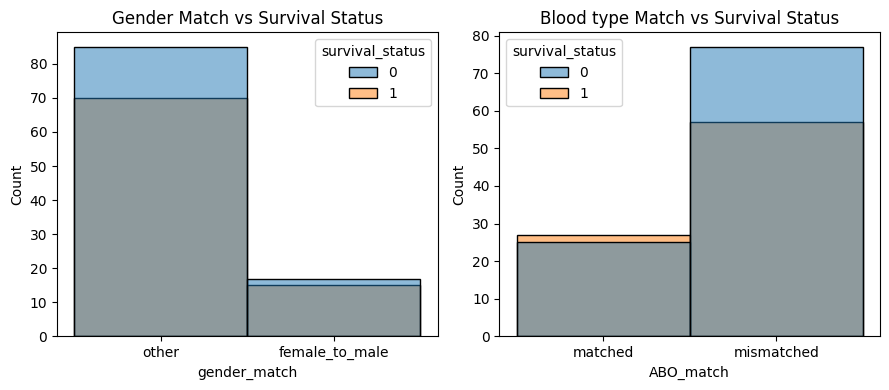

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(9,4))

sns.histplot(
    x="gender_match",
    hue="survival_status",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Gender Match vs Survival Status")

sns.histplot(
    x="ABO_match",
    hue="survival_status",
    data=df,
    ax=axes[1]
)
axes[1].set_title("Blood type Match vs Survival Status")


plt.tight_layout()
plt.show()

In [26]:
df1 = df.applymap(lambda x: -1 if x == '?' else x)
df1["HLA_match"] = df["HLA_match"].apply(lambda x: int(x.split('/')[0]))
df1.convert_dtypes()

df

C:\Users\Tomás L Pereira\AppData\Local\Temp\ipykernel_33556\449014735.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df.applymap(lambda x: -1 if x == '?' else x)


,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status,age_gap,age_gap_bin
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,no,7.20,5.38,1.338760,19,51,yes,yes,32,no,no,999,0,13.230137,"[10, 20)"
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16,37,yes,no,1000000,no,yes,163,1,19.342466,"[10, 20)"
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,7.94,0.42,19.013230,23,20,yes,no,1000000,no,yes,435,1,19.794521,"[10, 20)"
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23,29,yes,yes,19,NaN,no,53,1,21.584932,"[20, 30)"
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14,14,no,no,1000000,no,no,2043,0,32.058904,"[30, 40)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,minus,present,lymphoma,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,yes,11.08,4.39,2.522750,15,22,yes,yes,16,no,yes,385,1,24.675342,"[20, 30)"
183,22.895890,yes,A,absent,13.9,no,10_20,female,44.5,0,plus,present,AML,malignant,other,mismatched,2.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,no,4.64,4.47,1.038858,12,30,no,no,1000000,no,no,634,1,8.995890,"[0, 10)"
184,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,plus,present,nonmalignant,nonmalignant,other,mismatched,3.0,10/10,matched,0.0,0.0,matched,low,peripheral_blood,no,7.73,4.73,1.635559,16,16,yes,no,1000000,no,no,1895,0,16.947945,"[10, 20)"
185,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,plus,absent,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,low,peripheral_blood,no,15.41,1.91,8.077770,13,14,yes,yes,54,yes,no,382,1,19.780822,"[10, 20)"


<Axes: >

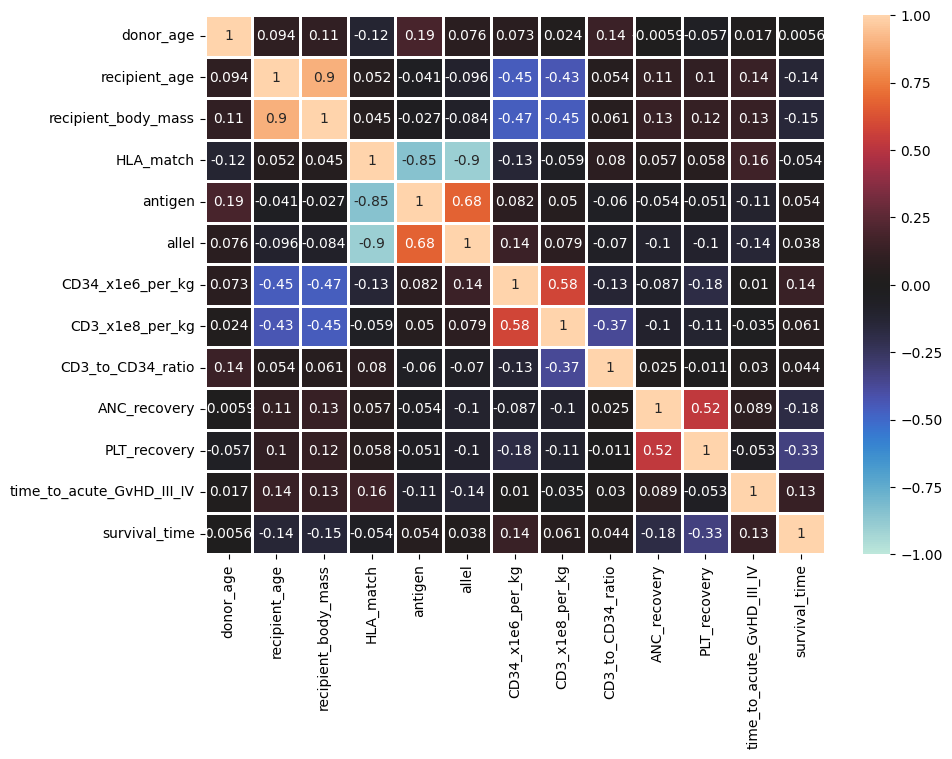

In [27]:
num_df = df1[["donor_age", "recipient_age", "recipient_body_mass", "HLA_match", "antigen", "allel", "CD34_x1e6_per_kg","CD3_x1e8_per_kg", "CD3_to_CD34_ratio", "ANC_recovery", "PLT_recovery", "time_to_acute_GvHD_III_IV", "survival_time"]]

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
    data=num_df.corr(method="pearson"),
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    linewidth=2
)

In [28]:
pd.crosstab([df1["allel"], df1["antigen"]], df1["HLA_match"])

HLA_match      7   8   9   10
allel antigen                
0.0   0.0       0   0   0  93
1.0   2.0       0   0  47   0
      3.0       0   7   0   0
2.0   1.0       0   0  18   0
      2.0       0  14   0   0
3.0   1.0       0   2   0   0
      2.0       4   0   0   0
4.0   1.0       1   0   0   0

In [29]:
pd.crosstab([df1["allel"], df1["antigen"]], df1["HLA_group_1"])

HLA_group_1    DRB1_cell  matched  mismatched  one_allel  one_antigen  \
allel antigen                                                           
0.0   0.0              0       93           0          0            0   
1.0   2.0              6        0           0          0           41   
      3.0              0        0           0          0            0   
2.0   1.0              3        0           0         14            1   
      2.0              0        0           0          0            0   
3.0   1.0              0        0           0          0            0   
      2.0              0        0           4          0            0   
4.0   1.0              0        0           1          0            0   

HLA_group_1    three_diffs  two_diffs  
allel antigen                          
0.0   0.0                0          0  
1.0   2.0                0          0  
      3.0                0          7  
2.0   1.0                0          0  
      2.0                3         11  
3.0   1.0                1          1  
      2.0                0          0  
4.0   1.0                0          0

<Axes: xlabel='risk_group', ylabel='Count'>

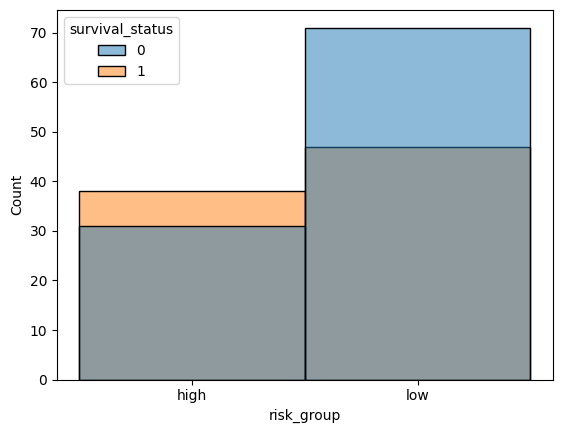

In [30]:
sns.histplot(
    x="risk_group",
    hue="survival_status",
    data=df1
)

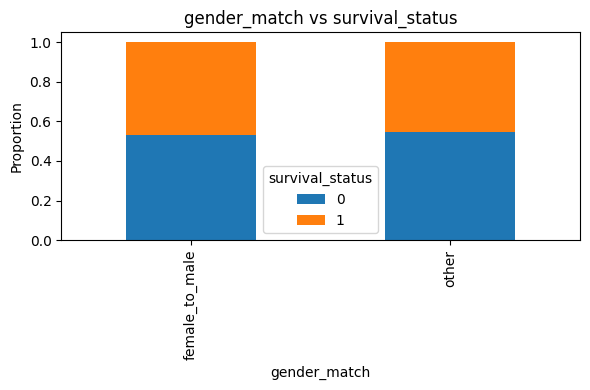

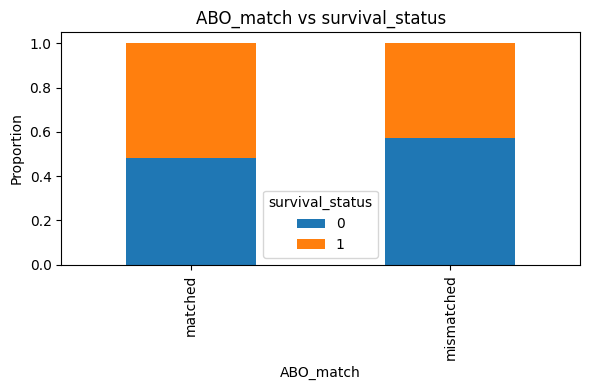

In [31]:
def plot_normalized_stacked(df, feature, target):
    ct = pd.crosstab(df[feature], df[target], normalize="index")

    ct.plot(
        kind="bar",
        stacked=True,
        figsize=(6,4)
    )

    plt.ylabel("Proportion")
    plt.xlabel(feature)
    plt.title(f"{feature} vs {target}")
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()


plot_normalized_stacked(df, "gender_match", "survival_status")
plot_normalized_stacked(df, "ABO_match", "survival_status")


<Axes: xlabel='donor_age', ylabel='Count'>

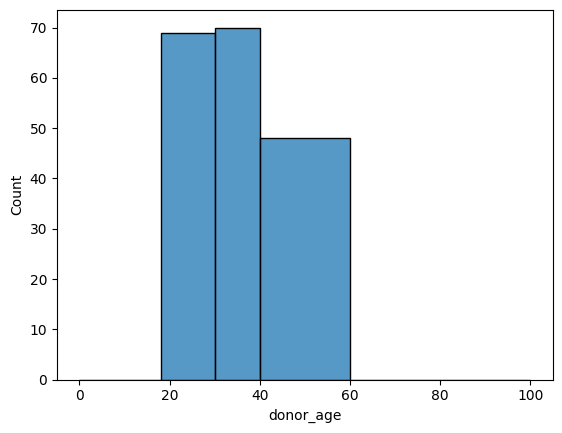

In [32]:
sns.histplot(
    data=df,
    x="donor_age",
    bins=[0, 18, 30, 40, 60, 100])

In [33]:
targets = df1[["survival_time", "survival_status"]]
X = df.loc[:, : "stem_cell_source"].copy()
X["age_gap"] = df["age_gap"]
X

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,age_gap
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,13.230137
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,19.342466
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,19.794521
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,21.584932
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,high,peripheral_blood,32.058904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,minus,present,lymphoma,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,24.675342
183,22.895890,yes,A,absent,13.9,no,10_20,female,44.5,0,plus,present,AML,malignant,other,mismatched,2.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,8.995890
184,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,plus,present,nonmalignant,nonmalignant,other,mismatched,3.0,10/10,matched,0.0,0.0,matched,low,peripheral_blood,16.947945
185,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,plus,absent,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,low,peripheral_blood,19.780822


In [34]:
from sklearn.model_selection import train_test_split
targets = targets.rename(columns={"survival_status": "is_dead"})
targets

,survival_time,is_dead
0,999,0
1,163,1
2,435,1
3,53,1
4,2043,0
...,...,...
182,385,1
183,634,1
184,1895,0
185,382,1


In [35]:
df["survival_status"].value_counts(normalize=True)

survival_status
0    0.545455
1    0.454545
Name: proportion, dtype: float64

In [36]:
X.isna().mean().sort_values(ascending=False)

CMV_status                0.085561
recipient_CMV             0.074866
recipient_rh              0.010695
recipient_body_mass       0.010695
donor_CMV                 0.010695
recipient_ABO             0.005348
antigen                   0.005348
allel                     0.005348
ABO_match                 0.005348
recipient_gender          0.000000
recipient_age_int         0.000000
recipient_age_below_10    0.000000
recipient_age             0.000000
donor_age_below_35        0.000000
donor_ABO                 0.000000
donor_age                 0.000000
disease                   0.000000
disease_group             0.000000
gender_match              0.000000
HLA_mismatch              0.000000
HLA_match                 0.000000
HLA_group_1               0.000000
risk_group                0.000000
stem_cell_source          0.000000
age_gap                   0.000000
dtype: float64

In [37]:
df.assign(survived=df["survival_status"]).groupby("survived")["survival_time"].describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,102.0,1527.725490,712.147028,433.0,999.25,1428.0,2041.25,3364.0
1,85.0,231.964706,248.528452,6.0,58.00,149.0,330.00,1243.0


# Modelling

In [38]:
y_clf = targets["is_dead"]
y_reg = targets["survival_time"]
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(X, y_reg, y_clf, test_size=0.15, random_state=42, stratify=y_clf)
X

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,age_gap
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,13.230137
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,19.342466
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,19.794521
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1.0,10/10,matched,0.0,0.0,matched,low,bone_marrow,21.584932
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,high,peripheral_blood,32.058904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,37.575342,no,A,present,12.9,no,10_20,male,44.0,A,minus,present,lymphoma,malignant,other,matched,3.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,24.675342
183,22.895890,yes,A,absent,13.9,no,10_20,female,44.5,0,plus,present,AML,malignant,other,mismatched,2.0,10/10,matched,0.0,0.0,matched,high,peripheral_blood,8.995890
184,27.347945,yes,A,present,10.4,no,10_20,female,33.0,B,plus,present,nonmalignant,nonmalignant,other,mismatched,3.0,10/10,matched,0.0,0.0,matched,low,peripheral_blood,16.947945
185,27.780822,yes,A,absent,8.0,yes,5_10,male,24.0,0,plus,absent,chronic,malignant,other,mismatched,0.0,9/10,matched,2.0,1.0,one_antigen,low,peripheral_blood,19.780822


In [39]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler

bool_cols = [
    "donor_age_below_35", 
    "donor_CMV", 
    "recipient_age_below_10", 
    "recipient_gender", 
    "recipient_CMV", 
    "disease_group", 
    "gender_match", 
    "ABO_match", 
    "HLA_mismatch", 
    "risk_group",
    "stem_cell_source"
]

cat_cols = [
    "CMV_status",
    "disease",
    "HLA_group_1",
    "recipient_age_int",
]

def feature_engineering(X):
    X = X.copy()

    # Age gap
    X["age_gap"] = (X["donor_age"] - X["recipient_age"]).abs()

    # Donor age bins
    X["donor_age_bin"] = pd.cut(
        X["donor_age"],
        bins=[0, 18, 40, 60, 100],
        labels=False
    )

    # Recipient age bins
    X["recipient_age_bin"] = pd.cut(
        X["recipient_age"],
        bins=[0, 2, 5, 7, 10, 18, 22],
        labels=False
    )

    return X[["donor_age_bin", 
              "recipient_age_bin", 
              "age_gap"]]

extra_cols = Pipeline([
    ("feature_engineering", FunctionTransformer(feature_engineering, feature_names_out=lambda self, input_features: ["donor_age_bin", "recipient_age_bin", "age_gap"])),
    ("imputer", SimpleImputer(strategy="median", add_indicator=True))
])


def parse_hla_match(X):
    s = X.iloc[:, 0]
    return (
        s
        .astype(str)
        .str.split("/", expand=True)[0]
        .astype(float)
        .to_frame()
    )


hla_pipeline = Pipeline([
    ("parser", FunctionTransformer(parse_hla_match, feature_names_out="one-to-one")),
    ("imputer", SimpleImputer(strategy="median", add_indicator=True))
])

bool_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ("encoder", OneHotEncoder(drop="if_binary"))
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ("one_hot", OneHotEncoder())
])

columns_to_drop = ["donor_ABO", 
                   "recipient_ABO", 
                   "recipient_rh", 
                   "recipient_gender",
                   "recipient_age_int",
                    "recipient_age_below_10",
                   "donor_age_below_35",
                   "recipient_CMV",
                   "donor_CMV",
                   "disease_group"] 

preprocessor = ColumnTransformer(
    transformers=[
        ("extra_cols", extra_cols, ["donor_age", "recipient_age"]),
        ("column_dropper", "drop", columns_to_drop),
        ("hla", hla_pipeline, ["HLA_match"]),
        ("bool", bool_pipeline, bool_cols),
        ("one_hot", cat_pipeline, cat_cols)
    ],
    remainder=SimpleImputer(strategy="median", add_indicator=True)
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

X_prepared = pipeline[:-1].fit_transform(X_train, y_clf_train)
print(pipeline[:-1].get_feature_names_out())
X_prepared

['extra_cols__donor_age_bin' 'extra_cols__recipient_age_bin'
 'extra_cols__age_gap' 'hla__HLA_match' 'bool__donor_age_below_35_yes'
 'bool__donor_CMV_present' 'bool__recipient_age_below_10_yes'
 'bool__recipient_gender_male' 'bool__recipient_CMV_present'
 'bool__disease_group_nonmalignant' 'bool__gender_match_other'
 'bool__ABO_match_mismatched' 'bool__HLA_mismatch_mismatched'
 'bool__risk_group_low' 'bool__stem_cell_source_peripheral_blood'
 'bool__missingindicator_donor_CMV_True'
 'bool__missingindicator_recipient_CMV_True'
 'bool__missingindicator_ABO_match_True' 'one_hot__CMV_status_0.0'
 'one_hot__CMV_status_1.0' 'one_hot__CMV_status_2.0'
 'one_hot__CMV_status_3.0' 'one_hot__disease_ALL' 'one_hot__disease_AML'
 'one_hot__disease_chronic' 'one_hot__disease_lymphoma'
 'one_hot__disease_nonmalignant' 'one_hot__HLA_group_1_DRB1_cell'
 'one_hot__HLA_group_1_matched' 'one_hot__HLA_group_1_mismatched'
 'one_hot__HLA_group_1_one_allel' 'one_hot__HLA_group_1_one_antigen'
 'one_hot__HLA_gro

array([[ 1.      ,  1.      , 25.835616, ...,  1.      ,  0.      ,
         0.      ],
       [ 1.      ,  3.      , 29.387671, ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      ,  1.      , 25.173973, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 1.      ,  4.      , 19.454795, ...,  0.      ,  0.      ,
         0.      ],
       [ 2.      ,  4.      , 26.691781, ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      ,  3.      , 28.832877, ...,  0.      ,  0.      ,
         0.      ]], shape=(158, 46))

## Logistic Regression Testing
### Without tuning

In [40]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from joblib import Memory

memory = Memory("joblib_cache", verbose=0)

pipeline.set_params(preprocessor__extra_cols="passthrough")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(pipeline, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
print(classification_report(y_clf_train, y_pred_cv))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


              precision    recall  f1-score   support

           0       0.60      0.71      0.65        86
           1       0.55      0.43      0.48        72

    accuracy                           0.58       158
   macro avg       0.58      0.57      0.57       158
weighted avg       0.58      0.58      0.57       158



[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    5.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished


### With tuning
#### Without FE

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__C": [0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}

def run_gs_lr(param_grid, X_train, y_clf_train):
    gs_lr = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted', verbose=True)
    gs_lr.fit(X_train, y_clf_train)
    return gs_lr

gs_lr = run_gs_lr(param_grid, X_train, y_clf_train)

y_pred_cv = cross_val_predict(gs_lr.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
print(classification_report(y_clf_train, y_pred_cv))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\Tomás L Pereira\PycharmProjects\challenge-21\challenge2\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0683441162109375s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.60      0.74      0.66        86
           1       0.57      0.40      0.47        72

    accuracy                           0.59       158
   macro avg       0.58      0.57      0.57       158
weighted avg       0.58      0.59      0.58       158



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### With FE

In [42]:
pipeline.set_params(preprocessor__extra_cols=extra_cols)

gs_lr = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted', verbose=True)
gs_lr.fit(X_train, y_clf_train)

y_pred_cv = cross_val_predict(gs_lr.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
print(classification_report(y_clf_train, y_pred_cv))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\Tomás L Pereira\PycharmProjects\challenge-21\challenge2\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.09583592414855957s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.61      0.76      0.67        86
           1       0.59      0.42      0.49        72

    accuracy                           0.60       158
   macro avg       0.60      0.59      0.58       158
weighted avg       0.60      0.60      0.59       158



## Random Forest
### Without tuning

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipeline.set_params(preprocessor__extra_cols="passthrough")

pipeline.set_params(
    model=RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )
)

y_pred_cv = cross_val_predict(pipeline, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
print(classification_report(y_clf_train, y_pred_cv))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


              precision    recall  f1-score   support

           0       0.62      0.72      0.67        86
           1       0.59      0.47      0.52        72

    accuracy                           0.61       158
   macro avg       0.60      0.60      0.59       158
weighted avg       0.60      0.61      0.60       158



[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


### With tuning
#### Without FE

In [44]:
pipeline.set_params(preprocessor__extra_cols="passthrough")

param_grid = {
    'model__n_estimators': [25, 50, 75, 100, 150],
    'model__max_depth': [None, 3, 5, 7],
    'model__max_features': ["sqrt", 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
}

def run_gs_rf(param_grid, X_train, y_clf_train):
    gs_rf = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted', verbose=True)
    gs_rf.fit(X_train, y_clf_train)
    return gs_rf

# gs_rf = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_rf.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

#### With FE

In [45]:
pipeline.set_params(preprocessor__extra_cols=extra_cols)

gs_rf = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted', verbose=True)
gs_rf.fit(X_train, y_clf_train)

y_pred_cv = cross_val_predict(gs_rf.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
print(classification_report(y_clf_train, y_pred_cv))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        86
           1       0.65      0.58      0.61        72

    accuracy                           0.66       158
   macro avg       0.66      0.66      0.66       158
weighted avg       0.66      0.66      0.66       158



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.13198161125183105s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


### ExtraTreesClassifier

In [46]:
# from sklearn.ensemble import ExtraTreesClassifier

# pipeline.set_params(
#     model=ExtraTreesClassifier(
#         random_state=42,
#         n_jobs=-1
#     )
# )

# param_grid = {
#     "model__n_estimators": [100, 200, 400],
#     "model__max_depth": [None, 5, 10, 20],
#     "model__max_features": ["sqrt", 0.3, 0.5],
#     "model__min_samples_split": [2, 5, 10],
#     "model__min_samples_leaf": [1, 2, 5],
#     "model__criterion": ["gini", "entropy"],
# }

# gs_etc = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='f1_weighted', verbose=True)
# gs_etc.fit(X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_etc.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


              precision    recall  f1-score   support

           0       0.66      0.76      0.71        86
           1       0.65      0.54      0.59        72

    accuracy                           0.66       158
   macro avg       0.66      0.65      0.65       158
weighted avg       0.66      0.66      0.65       158



[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


### XGBoost
#### No FE

In [47]:
# from xgboost import XGBClassifier

# pipeline.set_params(
#     preprocessor__extra_cols="passthrough",
#     model=XGBClassifier(
#         objective="binary:logistic",
#         eval_metric="logloss",
#         random_state=42,
#         n_jobs=-1
#     )
# )

# param_grid = {
#     "model__max_depth": [2, 3, 4],
#     "model__learning_rate": [0.03, 0.05, 0.1],
#     "model__n_estimators": [50, 100, 150, 200, 300],
#     "model__subsample": [0.7, 0.8, 1.0],
#     "model__colsample_bytree": [0.7, 0.8, 1.0],
# }

# gs_xg = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_xg.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

#### With FE

In [48]:
# pipeline.set_params(preprocessor__extra_cols=extra_cols)

# gs_xg = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_xg.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

### SVM
#### No FE

In [49]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# pipeline.set_params(
#     preprocessor__extra_cols="passthrough",
#     model=SVC(class_weight="balanced",  # VERY important for your data
#             max_iter=10_000,
#             random_state=42,
# ))

# param_grid = {'model__C': [0.1, 1, 10, 100, 1000], 
# 			'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
# 			'model__kernel': ['rbf']} 

# gs_svm = run_gs_rf(param_grid, X_train, y_clf_train)
# y_pred_cv = cross_val_predict(gs_svm.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

#### With FE

In [50]:
# pipeline.set_params(preprocessor__extra_cols=extra_cols)

# gs_svm = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_svm.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

### LightGBM
#### No FE

In [51]:
# from lightgbm import LGBMClassifier

# pipeline.set_params(
#     preprocessor__extra_cols="passthrough",
#     model=LGBMClassifier(
#         eval_metric="logloss",
#         random_state=42,
#         n_jobs=-1
#     )
# )

# param_grid = {
#     "model__num_leaves": [7, 15, 31],
#     "model__learning_rate": [0.03, 0.05, 0.1],
#     "model__n_estimators": [50, 100, 150, 200],
#     "model__subsample": [0.7, 0.8, 1.0],
#     "model__colsample_bytree": [0.7, 0.8, 1.0],
# }


# gs_xg = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_xg.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

#### With FE

In [52]:
# pipeline.set_params(preprocessor__extra_cols=extra_cols)

# gs_xg = run_gs_rf(param_grid, X_train, y_clf_train)

# y_pred_cv = cross_val_predict(gs_xg.best_estimator_, X_train, y_clf_train, cv=cv, verbose=10, n_jobs=-1)
# print(classification_report(y_clf_train, y_pred_cv))

# Regression without Classification
## Linear Regression
### Ridge
#### No FE

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

frames = [X_train, y_clf_train, y_reg_train]
X_mask = pd.concat(frames, axis=1)
X_mask = X_mask[X_mask["is_dead"] == 1]
y_reg_train_mask = X_mask["survival_time"]
X_mask = X_mask.drop(columns=["is_dead", "survival_time"])

y_rf_pred = gs_rf.predict(X_train)

pipeline.set_params(
    preprocessor__extra_cols="passthrough",
    model= Ridge()
)

param_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "model__fit_intercept": [True, False]
}

cv_reg = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

def run_gs_reg(param_grid, X_train, y_reg_train):
    gs = GridSearchCV(pipeline, param_grid, cv=cv_reg, n_jobs=-1, scoring="neg_mean_absolute_error", verbose=True)
    gs.fit(X_train, y_reg_train)

    print("Best MAE:", -gs.best_score_)
    print("Best params:", gs.best_params_)
    return gs


gs_lrr = run_gs_reg(param_grid, X_train, y_reg_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best MAE: 731.5692911446947
Best params: {'model__alpha': 100, 'model__fit_intercept': False}


#### With FE

In [54]:
pipeline.set_params(preprocessor__extra_cols=extra_cols)

gs_lrr = run_gs_reg(param_grid, X_train, y_reg_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best MAE: 728.8986747006713
Best params: {'model__alpha': 100, 'model__fit_intercept': False}


### RandomForestRegressor
#### No FE

In [55]:
from sklearn.ensemble import RandomForestRegressor


pipeline.set_params(
    preprocessor__extra_cols="passthrough",
    model=RandomForestRegressor()
)

param_grid = {
    'model__n_estimators': [25, 50, 75, 100, 150],
    'model__max_depth': [None, 3, 5, 7],
    'model__max_features': ["sqrt", 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
}

gs_lrr = run_gs_reg(param_grid, X_train, y_reg_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best MAE: 677.2847404166847
Best params: {'model__max_depth': None, 'model__max_features': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 25}


#### With FE

In [56]:
pipeline.set_params(preprocessor__extra_cols=extra_cols)

gs_lrr = run_gs_reg(param_grid, X_train, y_reg_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best MAE: 682.7606400337237
Best params: {'model__max_depth': None, 'model__max_features': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 25}


### XGBClassifier
#### No FE

In [57]:
# from xgboost import XGBRegressor

# pipeline.set_params(
#     preprocessor__extra_cols="passthrough",
#     model=XGBRegressor(
#         objective="reg:squarederror",
#         eval_metric="rmse",
#         random_state=42,
#         n_jobs=-1
#     )
# )

# param_grid = {
#     "model__max_depth": [2, 3, 4],
#     "model__learning_rate": [0.03, 0.05, 0.1],
#     "model__n_estimators": [50, 100, 150, 200, 300],
#     "model__subsample": [0.7, 0.8, 1.0],
#     "model__colsample_bytree": [0.7, 0.8, 1.0],
# }

# gs_lrr = run_gs_reg(param_grid, X_mask, y_reg_train_mask)

#### With FE

In [58]:
# pipeline.set_params(preprocessor__extra_cols=extra_cols)

# gs_lrr = run_gs_reg(param_grid, X_mask, y_reg_train_mask)

### SVR
#### No FE

In [59]:
# from sklearn.svm import SVR


# pipeline.set_params(
#     preprocessor__extra_cols="passthrough",
#     model=SVR()
# )

# param_grid = {
#     "model__kernel": ["linear", "rbf"],
#     "model__C": [0.1, 1, 10],
#     "model__epsilon": [30, 90, 180]
# }

# gs_lrr = run_gs_reg(param_grid, X_mask, y_reg_train_mask)

#### With FE

In [60]:
# pipeline.set_params(preprocessor__extra_cols=extra_cols)

# gs_lrr = run_gs_reg(param_grid, X_mask, y_reg_train_mask)

# Regression with classification
## Linear Regression
#### No FE

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import StackingRegressor

class AddDeathProb(BaseEstimator, TransformerMixin):
    def __init__(self, clf):
        self.clf = clf  # already-trained classifier

    def fit(self, X, y=None):
        return self  # nothing to fit

    def transform(self, X):
        # predict probability of death (class = 1)
        death_prob = self.clf.predict_proba(X)[:, 1]

        X_out = X.copy()
        X_out["death_prob"] = death_prob
        return X_out

from sklearn.pipeline import Pipeline

time_pipeline = Pipeline([
    ("add_death_prob", AddDeathProb(gs_rf.best_estimator_)),
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

test = time_pipeline.fit(X_train, y_reg_train)
time_pred_train = time_pipeline.predict(X_train)
death_prob_train = gs_rf.best_estimator_.predict_proba(X_train)[:, 1]

In [62]:

comparison = pd.DataFrame({
    "death_true": y_clf_train.values,
    "death_prob": death_prob_train,
    "time_true": y_reg_train.values,
    "time_pred": time_pred_train,
})

comparison["final_decision"] = comparison.apply(
    lambda r: "Survives" if r.death_prob < 0.5 else f"Dies (~{r.time_pred:.0f} days)",
    axis=1
)

comparison

,death_true,death_prob,time_true,time_pred,final_decision
0,1,0.76,385,319.60,Dies (~320 days)
1,1,0.76,11,59.65,Dies (~60 days)
2,1,0.84,31,150.29,Dies (~150 days)
3,0,0.12,999,1087.27,Survives
4,1,0.88,202,222.85,Dies (~223 days)
...,...,...,...,...,...
153,1,0.68,149,166.43,Dies (~166 days)
154,1,0.84,196,194.16,Dies (~194 days)
155,1,0.80,57,164.75,Dies (~165 days)
156,0,0.28,754,1114.78,Survives


In [63]:
time_pred_test = time_pipeline.predict(X_test)
death_prob_test = gs_rf.best_estimator_.predict_proba(X_test)[:, 1]

comparison = pd.DataFrame({
    "death_true": y_clf_test.values,
    "death_prob": death_prob_test,
    "time_true": y_reg_test.values,
    "time_pred": time_pred_test,
})

comparison["final_decision"] = comparison.apply(
    lambda r: "Survives" if r.death_prob < 0.5 else f"Dies (~{r.time_pred:.0f} days)",
    axis=1
)
comparison

,death_true,death_prob,time_true,time_pred,final_decision
0,0,0.20,1171,1719.46,Survives
1,1,0.36,45,1637.58,Survives
2,1,0.24,115,1713.44,Survives
3,1,0.72,136,369.76,Dies (~370 days)
4,0,0.64,2800,229.37,Dies (~229 days)
5,0,0.44,452,746.61,Survives
6,0,0.28,824,1347.86,Survives
7,1,0.60,246,317.09,Dies (~317 days)
8,1,0.88,26,293.16,Dies (~293 days)
9,0,0.68,1138,265.52,Dies (~266 days)


# SMOTE Test